# 📚 ML Workshop - Numbers, Sets, and Functions

**Author:** Shuvam Banerji Seal

This notebook explores the mathematical foundations that underpin machine learning:
- Number systems (Natural, Integer, Rational, Real, Complex)
- Set theory basics
- Functions and their properties
- Parameters vs Variables

---

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch
import cmath

# Set plotting style
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Colors for our neon theme
CYAN = '#00d9ff'
PINK = '#ff6b9d'
YELLOW = '#c8ff00'
GREEN = '#00ff88'

## 1. Number Systems

The hierarchy of number systems:

$$\mathbb{N} \subset \mathbb{Z} \subset \mathbb{Q} \subset \mathbb{R} \subset \mathbb{C}$$

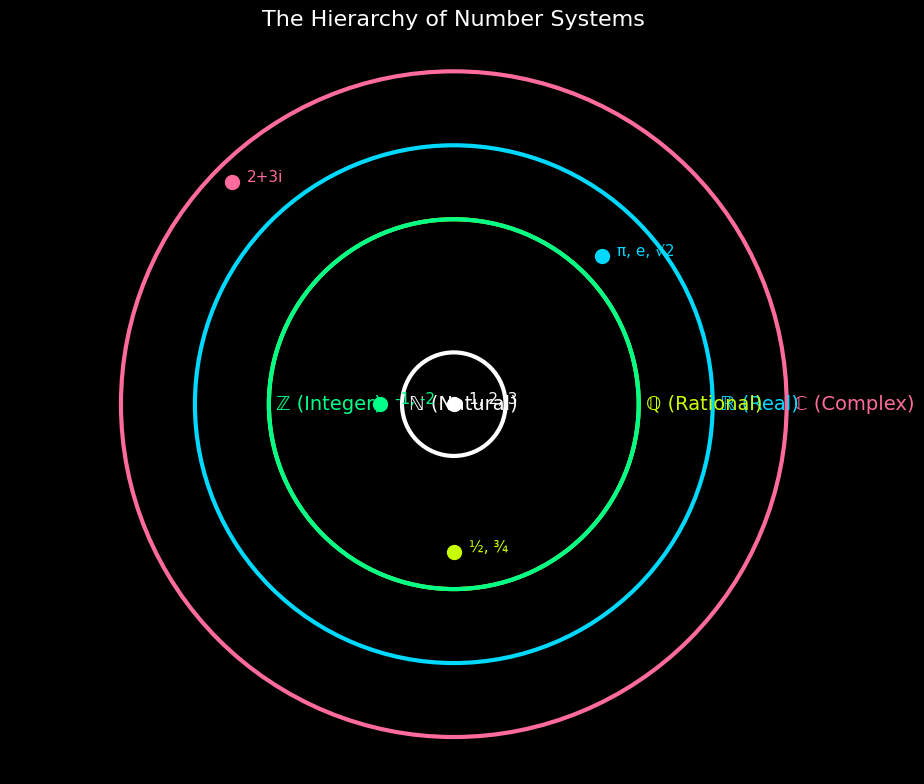

In [4]:
# Visualize number systems as nested sets
fig, ax = plt.subplots(figsize=(12, 8))

# Draw nested circles for number systems
sets = [
    ('ℂ (Complex)', 4.5, PINK),
    ('ℝ (Real)', 3.5, CYAN),
    ('ℚ (Rational)', 2.5, YELLOW),
    ('ℤ (Integer)', -2.5, GREEN),
    ('ℕ (Natural)', -0.7, 'white'),
]

for name, radius, color in sets:
    circle = Circle((0, 0), radius, fill=False, edgecolor=color, linewidth=3)
    ax.add_patch(circle)
    ax.annotate(name, xy=(radius + 0.1, 0), fontsize=14, color=color, 
                verticalalignment='center')

# Add example numbers
examples = [
    (0, 0, '1, 2, 3', 'white'),
    (-1, 0, '-1, -2', GREEN),
    (0, -2, '½, ¾', YELLOW),
    (2, 2, 'π, e, √2', CYAN),
    (-3, 3, '2+3i', PINK),
]

for x, y, text, color in examples:
    ax.plot(x, y, 'o', color=color, markersize=10)
    ax.annotate(text, xy=(x + 0.2, y), fontsize=11, color=color)

ax.set_xlim(-6, 6)
ax.set_ylim(-5, 5)
ax.set_aspect('equal')
ax.set_title('The Hierarchy of Number Systems', fontsize=16, color='white')
ax.axis('off')
plt.tight_layout()
plt.show()

## 2. Complex Numbers Visualization

Complex numbers: $z = a + bi$ where $i^2 = -1$

Euler's famous formula: $e^{i\pi} + 1 = 0$

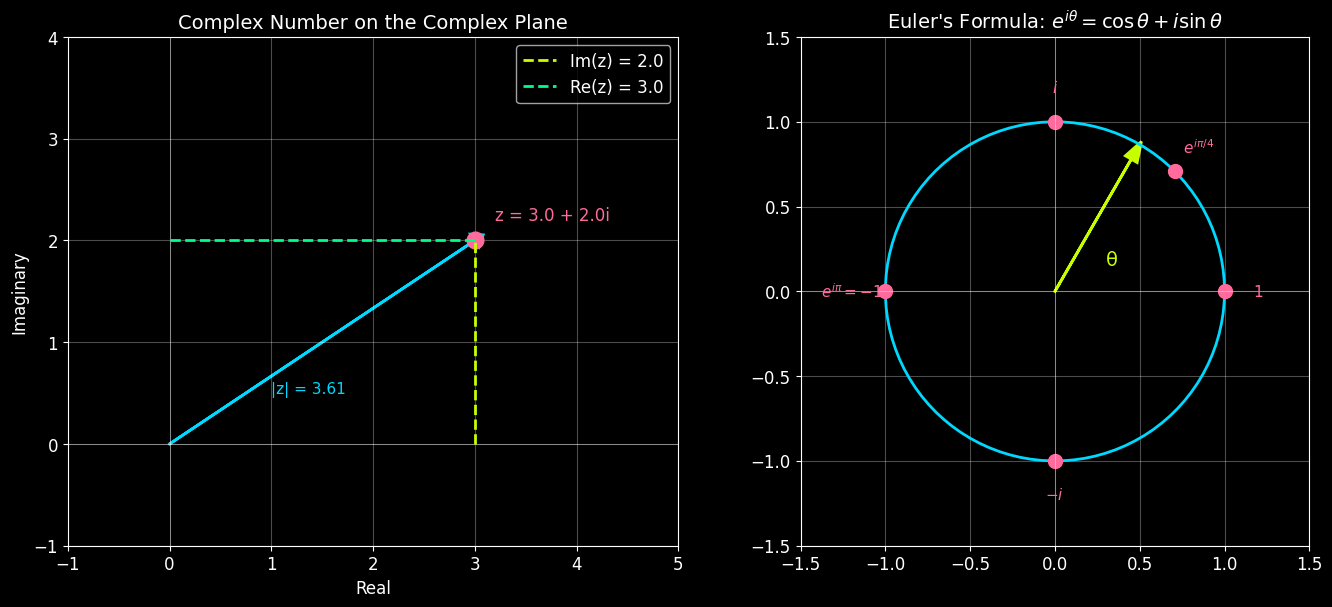


🔢 Euler's Identity Verification:
   e^(iπ) + 1 = 1.2246467991473532e-16j
   This is essentially 0 (floating point precision)!


In [5]:
# Visualize complex plane and Euler's formula
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left plot: Complex plane
ax1 = axes[0]
z = 3 + 2j

ax1.arrow(0, 0, z.real, z.imag, head_width=0.15, head_length=0.1, 
          fc=CYAN, ec=CYAN, linewidth=2)
ax1.plot(z.real, z.imag, 'o', color=PINK, markersize=12)
ax1.axhline(y=0, color='white', linewidth=0.5, alpha=0.5)
ax1.axvline(x=0, color='white', linewidth=0.5, alpha=0.5)

# Dashed lines to show components
ax1.plot([z.real, z.real], [0, z.imag], '--', color=YELLOW, linewidth=2, label=f'Im(z) = {z.imag}')
ax1.plot([0, z.real], [z.imag, z.imag], '--', color=GREEN, linewidth=2, label=f'Re(z) = {z.real}')

ax1.annotate(f'z = {z.real} + {z.imag}i', xy=(z.real + 0.2, z.imag + 0.2), 
             fontsize=12, color=PINK)
ax1.annotate(f'|z| = {abs(z):.2f}', xy=(1, 0.5), fontsize=11, color=CYAN)

ax1.set_xlim(-1, 5)
ax1.set_ylim(-1, 4)
ax1.set_xlabel('Real', fontsize=12)
ax1.set_ylabel('Imaginary', fontsize=12)
ax1.set_title('Complex Number on the Complex Plane', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# Right plot: Euler's formula e^(iθ) = cos(θ) + i*sin(θ)
ax2 = axes[1]
theta = np.linspace(0, 2*np.pi, 100)

# Unit circle
ax2.plot(np.cos(theta), np.sin(theta), color=CYAN, linewidth=2, label="Unit circle")

# Mark special points
special_angles = [0, np.pi/4, np.pi/2, np.pi, 3*np.pi/2]
labels = ['1', 'e^{iπ/4}', 'i', 'e^{iπ}=-1', '-i']

for angle, label in zip(special_angles, labels):
    x, y = np.cos(angle), np.sin(angle)
    ax2.plot(x, y, 'o', color=PINK, markersize=10)
    ax2.annotate(f'${label}$', xy=(x*1.2, y*1.2), fontsize=11, color=PINK,
                ha='center', va='center')

# Draw arrow for angle
angle_show = np.pi/3
ax2.arrow(0, 0, 0.9*np.cos(angle_show), 0.9*np.sin(angle_show), 
          head_width=0.08, color=YELLOW, linewidth=2)
ax2.annotate('θ', xy=(0.3, 0.15), fontsize=14, color=YELLOW)

ax2.axhline(y=0, color='white', linewidth=0.5, alpha=0.5)
ax2.axvline(x=0, color='white', linewidth=0.5, alpha=0.5)
ax2.set_xlim(-1.5, 1.5)
ax2.set_ylim(-1.5, 1.5)
ax2.set_aspect('equal')
ax2.set_title(r"Euler's Formula: $e^{i\theta} = \cos\theta + i\sin\theta$", fontsize=14)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Verify Euler's identity
print("\n🔢 Euler's Identity Verification:")
result = cmath.exp(1j * cmath.pi) + 1
print(f"   e^(iπ) + 1 = {result}")
print(f"   This is essentially 0 (floating point precision)!")

## 3. Functions: Mapping Inputs to Outputs

A function $f: X \rightarrow Y$ maps each element in domain $X$ to exactly one element in codomain $Y$.

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_509336/2515930243.py:8: SyntaxWarning: invalid escape sequence '\s'
  (lambda x: np.sin(x), 'Sine: $f(x) = \sin(x)$', (-3, 3), (-1.5, 1.5)),
/tmp/ipykernel_509336/2515930243.py:10: SyntaxWarning: invalid escape sequence '\s'
  (lambda x: 1/(1 + np.exp(-x)), 'Sigmoid: $\sigma(x) = \\frac{1}{1+e^{-x}}$', (-6, 6), (-0.1, 1.1)),
/tmp/ipykernel_509336/2515930243.py:11: SyntaxWarning: invalid escape sequence '\m'
  (lambda x: np.maximum(0, x), 'ReLU: $f(x) = \max(0, x)$', (-3, 3), (-0.5, 3)),


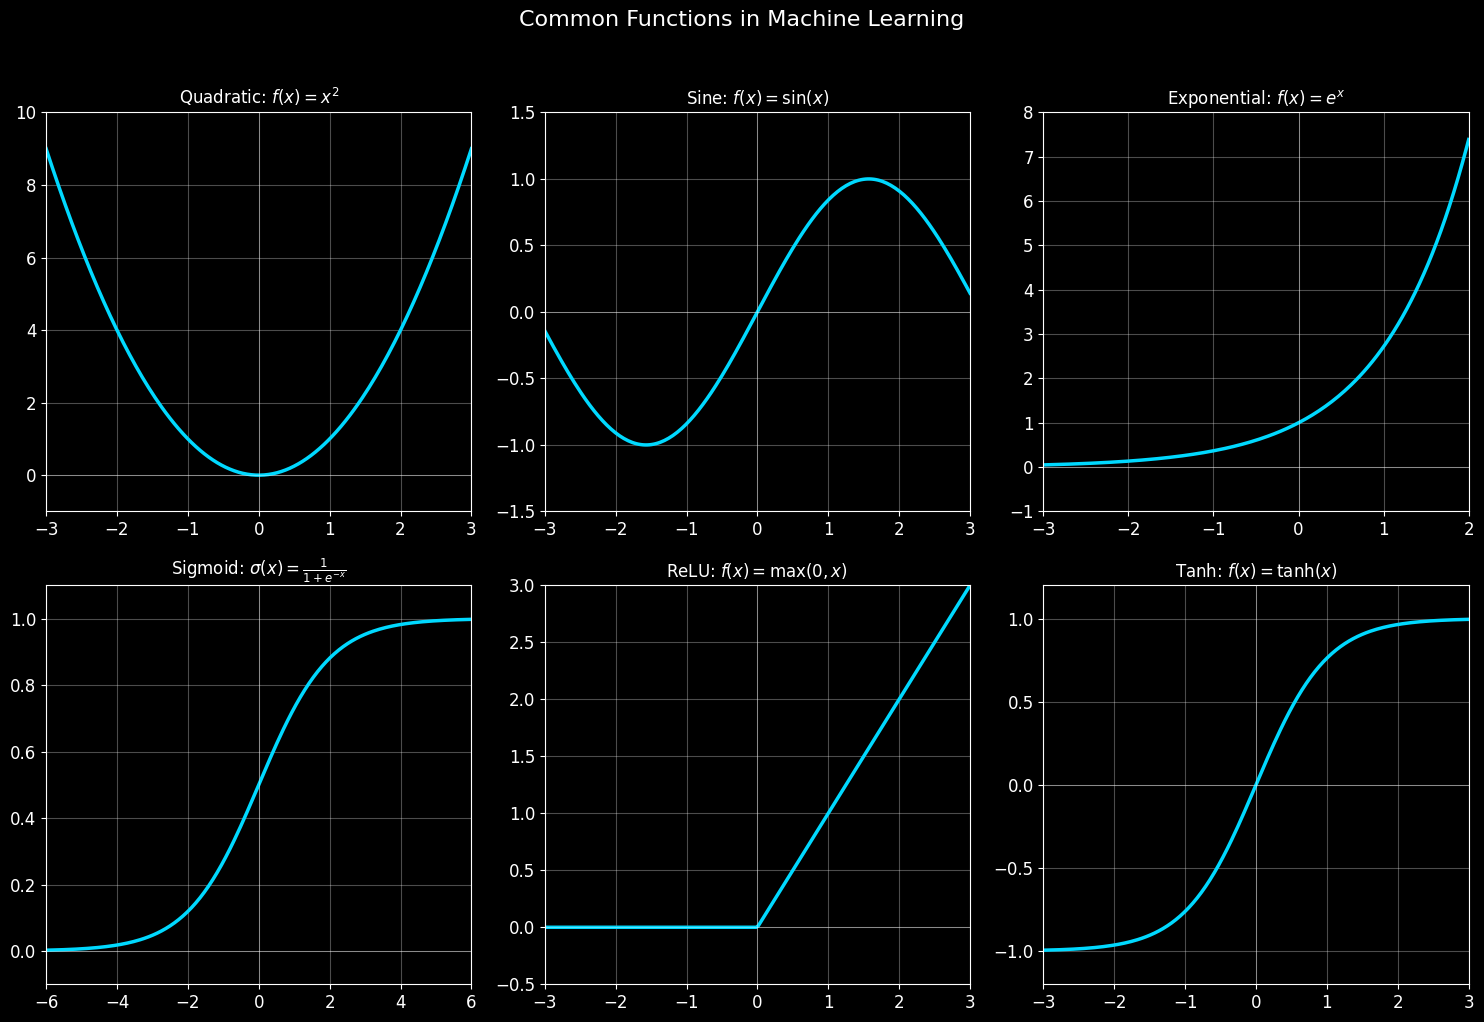

In [6]:
# Visualize different types of functions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

x = np.linspace(-3, 3, 200)

functions = [
    (lambda x: x**2, 'Quadratic: $f(x) = x^2$', (-3, 3), (-1, 10)),
    (lambda x: np.sin(x), 'Sine: $f(x) = \sin(x)$', (-3, 3), (-1.5, 1.5)),
    (lambda x: np.exp(x), 'Exponential: $f(x) = e^x$', (-3, 2), (-1, 8)),
    (lambda x: 1/(1 + np.exp(-x)), 'Sigmoid: $\sigma(x) = \\frac{1}{1+e^{-x}}$', (-6, 6), (-0.1, 1.1)),
    (lambda x: np.maximum(0, x), 'ReLU: $f(x) = \max(0, x)$', (-3, 3), (-0.5, 3)),
    (lambda x: np.tanh(x), 'Tanh: $f(x) = \\tanh(x)$', (-3, 3), (-1.2, 1.2)),
]

for ax, (func, title, xlim, ylim) in zip(axes.flatten(), functions):
    x_plot = np.linspace(xlim[0], xlim[1], 200)
    y_plot = func(x_plot)
    
    ax.plot(x_plot, y_plot, color=CYAN, linewidth=2.5)
    ax.axhline(y=0, color='white', linewidth=0.5, alpha=0.5)
    ax.axvline(x=0, color='white', linewidth=0.5, alpha=0.5)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(title, fontsize=12)
    ax.grid(True, alpha=0.3)

plt.suptitle('Common Functions in Machine Learning', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 4. Activation Functions: The Heart of Neural Networks

Activation functions introduce non-linearity, enabling neural networks to learn complex patterns.

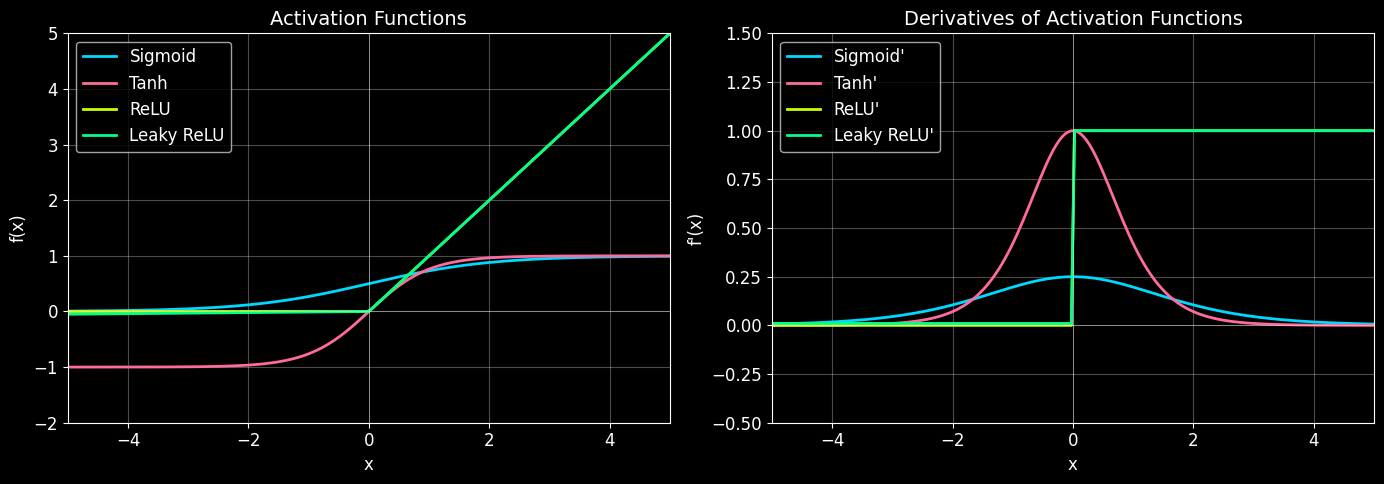

In [7]:
# Compare activation functions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.linspace(-5, 5, 200)

# Activation functions
activations = [
    (lambda x: 1/(1 + np.exp(-x)), 'Sigmoid', CYAN),
    (lambda x: np.tanh(x), 'Tanh', PINK),
    (lambda x: np.maximum(0, x), 'ReLU', YELLOW),
    (lambda x: np.where(x > 0, x, 0.01*x), 'Leaky ReLU', GREEN),
]

# Left plot: Activation functions
ax1 = axes[0]
for func, name, color in activations:
    ax1.plot(x, func(x), label=name, color=color, linewidth=2)

ax1.axhline(y=0, color='white', linewidth=0.5, alpha=0.5)
ax1.axvline(x=0, color='white', linewidth=0.5, alpha=0.5)
ax1.set_xlim(-5, 5)
ax1.set_ylim(-2, 5)
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title('Activation Functions', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Right plot: Derivatives (for backpropagation)
ax2 = axes[1]

# Numerical derivatives
def numerical_derivative(func, x, h=1e-5):
    return (func(x + h) - func(x - h)) / (2 * h)

for func, name, color in activations:
    deriv = numerical_derivative(func, x)
    ax2.plot(x, deriv, label=f"{name}'", color=color, linewidth=2)

ax2.axhline(y=0, color='white', linewidth=0.5, alpha=0.5)
ax2.axvline(x=0, color='white', linewidth=0.5, alpha=0.5)
ax2.set_xlim(-5, 5)
ax2.set_ylim(-0.5, 1.5)
ax2.set_xlabel('x')
ax2.set_ylabel("f'(x)")
ax2.set_title('Derivatives of Activation Functions', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Parameters vs Variables

In machine learning:
- **Variables (x)**: Input data (features) - what we observe
- **Parameters (θ, w, b)**: Model weights - what we learn

$$f(x; \theta) = \theta_1 x + \theta_0$$

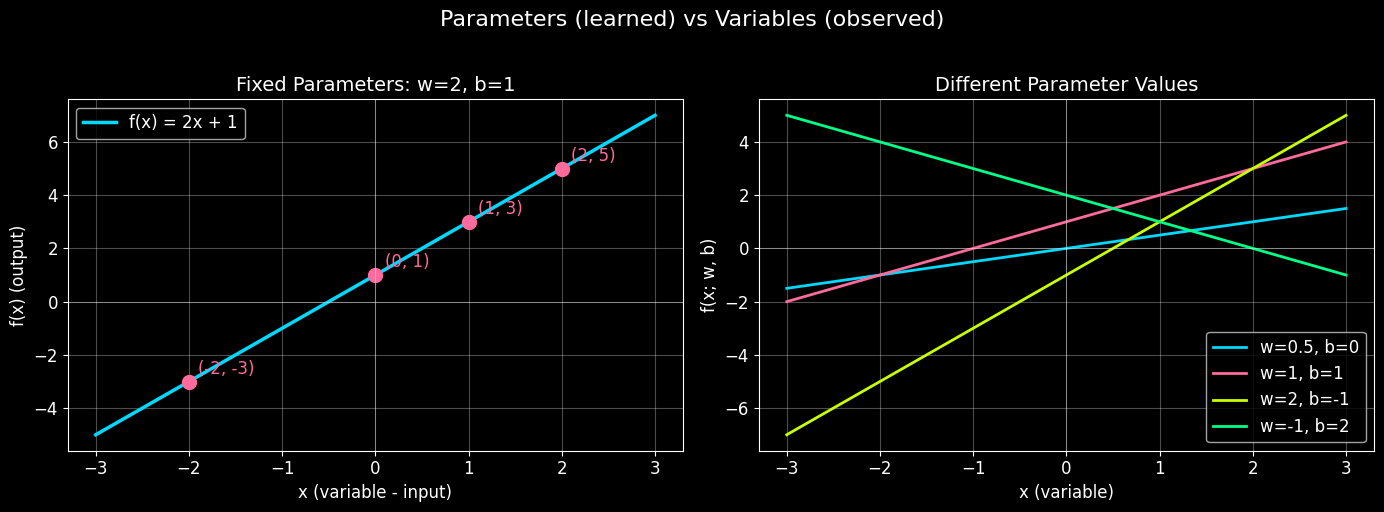


🎯 Key Insight:
   - During training: parameters change, variables are fixed (the data)
   - During inference: parameters are fixed (trained model), variables change (new inputs)


In [8]:
# Demonstrate the difference between parameters and variables
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.linspace(-3, 3, 100)

# Left: Varying the variable x (fixed parameters)
ax1 = axes[0]
w, b = 2, 1  # Fixed parameters

y = w * x + b
ax1.plot(x, y, color=CYAN, linewidth=2.5, label=f'f(x) = {w}x + {b}')

# Mark some input-output pairs
x_points = [-2, 0, 1, 2]
for xi in x_points:
    yi = w * xi + b
    ax1.plot(xi, yi, 'o', color=PINK, markersize=10)
    ax1.annotate(f'({xi}, {yi})', xy=(xi + 0.1, yi + 0.3), color=PINK)

ax1.axhline(y=0, color='white', linewidth=0.5, alpha=0.5)
ax1.axvline(x=0, color='white', linewidth=0.5, alpha=0.5)
ax1.set_xlabel('x (variable - input)', fontsize=12)
ax1.set_ylabel('f(x) (output)', fontsize=12)
ax1.set_title(f'Fixed Parameters: w={w}, b={b}', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Right: Varying parameters (fixed x domain)
ax2 = axes[1]
param_sets = [
    (0.5, 0, CYAN, 'w=0.5, b=0'),
    (1, 1, PINK, 'w=1, b=1'),
    (2, -1, YELLOW, 'w=2, b=-1'),
    (-1, 2, GREEN, 'w=-1, b=2'),
]

for w, b, color, label in param_sets:
    y = w * x + b
    ax2.plot(x, y, color=color, linewidth=2, label=label)

ax2.axhline(y=0, color='white', linewidth=0.5, alpha=0.5)
ax2.axvline(x=0, color='white', linewidth=0.5, alpha=0.5)
ax2.set_xlabel('x (variable)', fontsize=12)
ax2.set_ylabel('f(x; w, b)', fontsize=12)
ax2.set_title('Different Parameter Values', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.suptitle('Parameters (learned) vs Variables (observed)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("\n🎯 Key Insight:")
print("   - During training: parameters change, variables are fixed (the data)")
print("   - During inference: parameters are fixed (trained model), variables change (new inputs)")

## 6. Function Composition: Building Complex Functions

Neural networks are just compositions of simple functions!

$$(f \circ g)(x) = f(g(x))$$

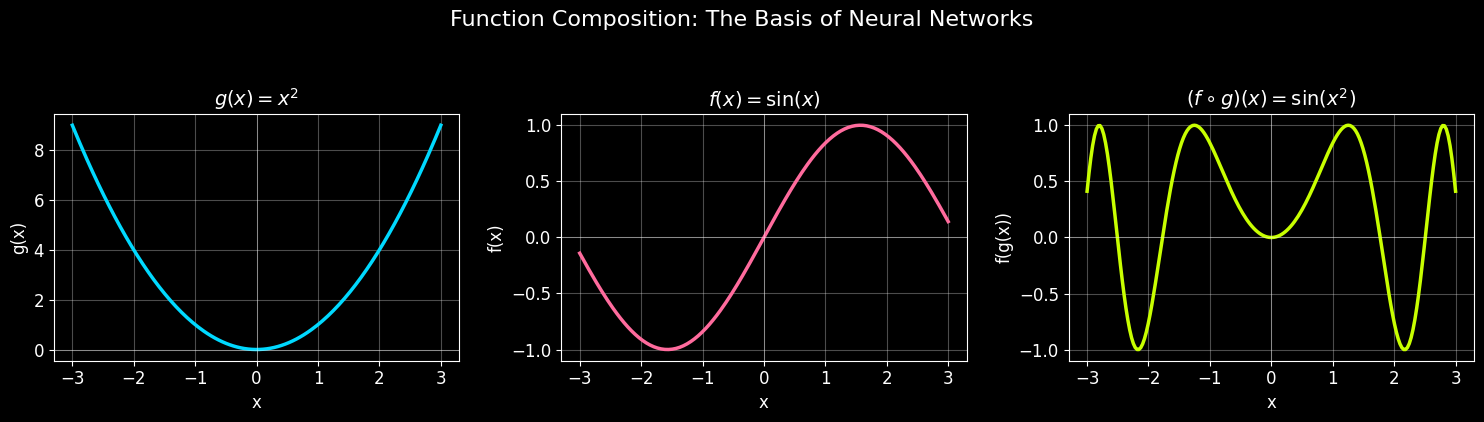


🧠 Neural Network Connection:
   A neural network layer: output = activation(W @ input + b)
   Multiple layers: output = f₃(f₂(f₁(input)))
   This is just function composition!


In [9]:
# Demonstrate function composition
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

x = np.linspace(-3, 3, 200)

# Define simple functions
g = lambda x: x**2  # First function
f = lambda x: np.sin(x)  # Second function
fog = lambda x: f(g(x))  # Composition f(g(x))

# Plot g(x)
axes[0].plot(x, g(x), color=CYAN, linewidth=2.5)
axes[0].set_title(r'$g(x) = x^2$', fontsize=14)
axes[0].set_xlabel('x')
axes[0].set_ylabel('g(x)')
axes[0].grid(True, alpha=0.3)

# Plot f(x)
axes[1].plot(x, f(x), color=PINK, linewidth=2.5)
axes[1].set_title(r'$f(x) = \sin(x)$', fontsize=14)
axes[1].set_xlabel('x')
axes[1].set_ylabel('f(x)')
axes[1].grid(True, alpha=0.3)

# Plot composition f(g(x))
axes[2].plot(x, fog(x), color=YELLOW, linewidth=2.5)
axes[2].set_title(r'$(f \circ g)(x) = \sin(x^2)$', fontsize=14)
axes[2].set_xlabel('x')
axes[2].set_ylabel('f(g(x))')
axes[2].grid(True, alpha=0.3)

for ax in axes:
    ax.axhline(y=0, color='white', linewidth=0.5, alpha=0.5)
    ax.axvline(x=0, color='white', linewidth=0.5, alpha=0.5)

plt.suptitle('Function Composition: The Basis of Neural Networks', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

print("\n🧠 Neural Network Connection:")
print("   A neural network layer: output = activation(W @ input + b)")
print("   Multiple layers: output = f₃(f₂(f₁(input)))")
print("   This is just function composition!")

## 📝 Summary

In this notebook, we explored:

1. **Number Systems**: From natural numbers to complex numbers
2. **Complex Numbers**: Euler's formula connecting exponentials and trigonometry
3. **Functions**: The building blocks of mathematical relationships
4. **Activation Functions**: Adding non-linearity to neural networks
5. **Parameters vs Variables**: What we learn vs what we observe
6. **Function Composition**: How neural networks build complex mappings

**Next**: Calculus Foundations (Limits, Derivatives, Integrals)